In [2]:
!conda install -c conda-forge geocoder --yes 

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geocoder


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    ca-certificates-2020.4.5.1 |       hecc5488_0         146 KB  conda-forge
    ratelim-0.1.6              |             py_2           6 KB  conda-forge
    openssl-1.1.1f             |       h516909a_0         2.1 MB  conda-forge
    geocoder-1.38.1            |             py_1          53 KB  conda-forge
    certifi-2020.4.5.1         |   py36h9f0ad1d_0         151 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geocoder:        1.38.1-py_1       conda-forge
    python_abi:    

In [4]:
!conda install -c conda-forge folium=0.5.0 --yes

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    branca-0.4.0               |             py_0          26 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    altair-4.1.0               |             py_1         614 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         713 KB

The following NEW packages will be INSTALLED:

    altair:  4.1.0-py_1 conda-forge
    branca:  0.4.0-py_0 conda-forge
    folium:  0.5.0-py_0 conda-forge
    vincent: 0.4.4-py_1 conda-forge


branca-0.4.0         | 26 KB     | ##################################### | 1

In [5]:
import random # library for random number generation
import numpy as np # library for vectorized computation
import pandas as pd # library to process data as dataframes
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import requests # library to handle requests
import json # library to handle JSON files
import bs4 as bs
import urllib.request

from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
from bs4 import BeautifulSoup
from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs

# geocoder
#!conda install -c conda-forge geocoder --yes 
import geocoder

#!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes
import folium # map rendering library

# use the inline backend to generate the plots within the browser
%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('ggplot') # optional: for ggplot-like style

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0
print('Libraries imported.')

Matplotlib version:  3.0.2
Libraries imported.


In [6]:
# Use the Notebook to build the code to scrape the following Wikipedia page, https://en.wikipedia.org
url='https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'

# The dataframe will consist of three columns: PostalCode, Borough, and Neighborhood
source = urllib.request.urlopen(url).read()
soup = bs.BeautifulSoup(source,'html.parser')

table = soup.find('table')
table_rows = table.find_all('tr')

l = []
for tr in table_rows:
    td = tr.find_all('td')
    row = [tr.text.strip() for tr in td if tr.text.strip()]
    if row:
        l.append(row)

In [7]:
df = pd.DataFrame(l, columns=["PostalCode", "Borough", "Neighbourhood"])
df.head(10)

,PostalCode,Borough,Neighbourhood
0,M1A,Not assigned,None
1,M2A,Not assigned,None
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Regent Park / Harbourfront
5,M6A,North York,Lawrence Manor / Lawrence Heights
6,M7A,Downtown Toronto,Queen's Park / Ontario Provincial Government
7,M8A,Not assigned,None
8,M9A,Etobicoke,Islington Avenue
9,M1B,Scarborough,Malvern / Rouge


In [8]:
# Only process the cells that have an assigned borough. Ignore cells with a borough that is Not assigned.
df = df[df.Borough != 'Not assigned']
df.head(10)

,PostalCode,Borough,Neighbourhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Regent Park / Harbourfront
5,M6A,North York,Lawrence Manor / Lawrence Heights
6,M7A,Downtown Toronto,Queen's Park / Ontario Provincial Government
8,M9A,Etobicoke,Islington Avenue
9,M1B,Scarborough,Malvern / Rouge
11,M3B,North York,Don Mills
12,M4B,East York,Parkview Hill / Woodbine Gardens
13,M5B,Downtown Toronto,"Garden District, Ryerson"


In [9]:
# If a cell has a borough but a Not assigned neighborhood, then the neighborhood will be the same as the borough.
df.loc[df['Neighbourhood']=='Not assigned', ['Neighbourhood']] = 'Queen\'s Park'
df.head(10)

,PostalCode,Borough,Neighbourhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Regent Park / Harbourfront
5,M6A,North York,Lawrence Manor / Lawrence Heights
6,M7A,Downtown Toronto,Queen's Park / Ontario Provincial Government
8,M9A,Etobicoke,Islington Avenue
9,M1B,Scarborough,Malvern / Rouge
11,M3B,North York,Don Mills
12,M4B,East York,Parkview Hill / Woodbine Gardens
13,M5B,Downtown Toronto,"Garden District, Ryerson"


In [10]:
# Use the Notebook to build the code to scrape the following Wikipedia page, https://en.wikipedia.org
url='https://en.wikipedia.org/wiki/Demographics_of_Toronto_neighbourhoods'
skip_table = 1

# The dataframe will consist of three columns: PostalCode, Borough, and Neighborhood
source = urllib.request.urlopen(url).read()
soup = bs.BeautifulSoup(source,'html.parser')

table = soup.find_all('table')[skip_table]
table_rows = table.find_all('tr')

l = []
for tr in table_rows:
    #print (tr)
    td = tr.find_all('td')
    row = [tr.text.strip() for tr in td if tr.text.strip()]
    if row:
        l.append(row)

In [11]:
df1 = pd.DataFrame(l, columns=["Neighbourhood", "FM", "Census", "Population", "Land Area", "Density", "Population %", "Income", "Commuting", "Renters", "2nd Language", "2nd Language %"])

# clean up the data and dropping unwanted columns
df1 = df1[df1.Neighbourhood != 'Toronto CMA Average']
df1 = df1.drop('FM', 1)
df1 = df1.drop('Census', 1)
df1 = df1.drop('Renters', 1)

# change to the proper datatype
df1['Population'] = df1['Population'].str.replace(',','')
df1['Population'] = df1['Population'].apply(pd.to_numeric)
#print (df1.dtypes)

# display sample data
df1.head(10)

,Neighbourhood,Population,Land Area,Density,Population %,Income,Commuting,2nd Language,2nd Language %
1,Agincourt,44577,12.45,3580,4.6,"25,750",11.1,Cantonese (19.3%),19.3% Cantonese
2,Alderwood,11656,4.94,2360,-4.0,"35,239",8.8,Polish (6.2%),06.2% Polish
3,Alexandra Park,4355,0.32,"13,609",0.0,"19,687",13.8,Cantonese (17.9%),17.9% Cantonese
4,Allenby,2513,0.58,4333,-1.0,"245,592",5.2,Russian (1.4%),01.4% Russian
5,Amesbury,17318,3.51,"4,934",1.1,"27,546",16.4,Spanish (6.1%),06.1% Spanish
6,Armour Heights,4384,2.29,1914,2.0,"116,651",10.8,Russian (9.4%),09.4% Russian
7,Banbury,6641,2.72,2442,5.0,"92,319",6.1,Unspecified Chinese (5.1%),05.1% Unspecified Chinese
8,Bathurst Manor,14945,4.69,3187,12.3,"34,169",13.4,Russian (9.5%),09.5% Russian
9,Bay Street Corridor,4787,0.11,"43,518",3.0,"40,598",17.1,Mandarin (9.6%),09.6% Mandarin
10,Bayview Village,12280,4.14,"2,966",41.6,"46,752",14.4,Cantonese (8.4%),08.4% Cantonese


In [12]:
# get the data size
df.shape
df1.shape

(174, 9)

In [15]:
df1['Latitude'] = 43.638093
df1['Longitude'] = -79.4665843

In [21]:
from geopy.geocoders import Nominatim

In [25]:

address = 'Agincourt'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

48.7323472 6.236384


In [28]:
df1.head()

,Neighbourhood,Population,Land Area,Density,Population %,Income,Commuting,2nd Language,2nd Language %,Latitude,Longitude
1,Agincourt,44577,12.45,3580,4.6,"25,750",11.1,Cantonese (19.3%),19.3% Cantonese,43.638093,-79.466584
2,Alderwood,11656,4.94,2360,-4.0,"35,239",8.8,Polish (6.2%),06.2% Polish,43.638093,-79.466584
3,Alexandra Park,4355,0.32,"13,609",0.0,"19,687",13.8,Cantonese (17.9%),17.9% Cantonese,43.638093,-79.466584
4,Allenby,2513,0.58,4333,-1.0,"245,592",5.2,Russian (1.4%),01.4% Russian,43.638093,-79.466584
5,Amesbury,17318,3.51,"4,934",1.1,"27,546",16.4,Spanish (6.1%),06.1% Spanish,43.638093,-79.466584


In [29]:
print('The dataframe has {} neighborhoods.'.format(
        len(df1['Neighbourhood'].unique()),
        df1.shape[0]
    )
)

The dataframe has 174 neighborhoods.


In [30]:
total_population = df1['Population'].sum()
#print (total_population)

# the higher populated neighbourhood will have the higher score
df1['Population Score'] = df1['Population']/total_population*100

# sort the dataframe based on the descending population score
df1 = df1.sort_values('Population Score', ascending=False)
df1.head(10)

,Neighbourhood,Population,Land Area,Density,Population %,Income,Commuting,2nd Language,2nd Language %,Latitude,Longitude,Population Score
113,Old East York,52220,7.94,6577,-4.6,"33,172",22.0,Greek (4.3%),04.3% Greek,43.638093,-79.466584,2.161626
170,Woburn,48507,13.34,3636,-1.5,"26,190",13.3,Gujarati (9.1%),09.1% Gujarati,43.638093,-79.466584,2.007928
50,Elia (Jane and Finch),48003,7.66,6267,-10.0,"22,691",13.0,Vietnamese (6.9%),06.9% Vietnamese,43.638093,-79.466584,1.987065
86,L'Amoreaux,45862,7.15,6414,0.9,"26,375",13.4,Unspecified Chinese (13.9%),13.9% Unspecified Chinese,43.638093,-79.466584,1.898439
1,Agincourt,44577,12.45,3580,4.6,"25,750",11.1,Cantonese (19.3%),19.3% Cantonese,43.638093,-79.466584,1.845247
98,Malvern,44324,8.86,5003,1.5,"25,677",13.6,Tamil (12.2%),12.2% Tamil,43.638093,-79.466584,1.834774
168,Willowdale,43144,7.68,5618,62.3,"39,895",15.6,Cantonese (7.9%),07.9% Cantonese,43.638093,-79.466584,1.785929
44,Downsview,36613,16.13,2270,-5.0,"26,751",14.4,Italian (11.7%),11.7% Italian,43.638093,-79.466584,1.515581
108,Newtonbrook,36046,8.77,4110,0.3,"33,428",16.6,Russian (8.8%),08.8% Russian,43.638093,-79.466584,1.492110
139,Smithfield,34996,6.45,5426,-7.2,"24,387",12.8,Punjabi (11.8%),11.8% Punjabi,43.638093,-79.466584,1.448645


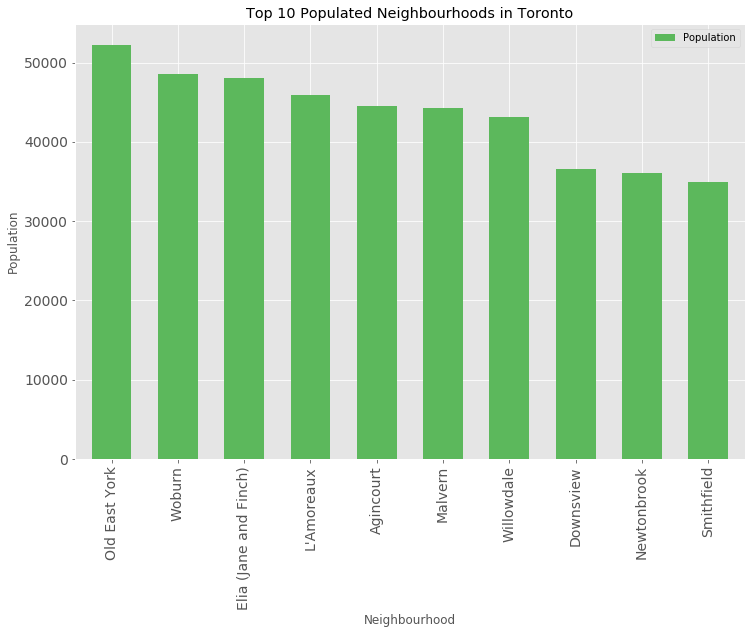

In [31]:
population_chart = df1[['Neighbourhood', 'Population']].copy()
top_chart = population_chart.head(10)
top_chart.set_index('Neighbourhood', inplace=True)

# plot data
colors = ['#5cb85c', '#5bc0de', '#d9534f']
top_chart.plot(kind='bar', figsize=(12, 8), width=0.6, fontsize=14, color=colors)

plt.xlabel('Neighbourhood') # add to x-label to the plot
plt.ylabel('Population') # add y-label to the plot
plt.title('Top 10 Populated Neighbourhoods in Toronto') # add title to the plot

plt.show()

In [32]:
# Use geopy library to get the latitude and longitude values of Toronto Ontario
address = 'Toronto Ontario, TO'
toronto_data = df1
geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto Ontario are {}, {}.'.format(latitude, longitude))

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:4: DeprecationWarning: Using Nominatim with the default "geopy/1.18.1" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.


The geograpical coordinate of Toronto Ontario are 43.6534817, -79.3839347.


In [33]:
# create map of Toronto Ontario using latitude and longitude values
map_to = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, neighborhood in zip(df1['Latitude'], df1['Longitude'], df1['Neighbourhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_to)  

map_to

In [34]:
CLIENT_ID = 'RF2HLDBFJ0Z0IAOHHOTQG4CMUCDM0RGVAF3DVCQFD153FMOB' # your Foursquare ID
CLIENT_SECRET = '2LYBEQRR5TXMPQWUFKMLWCIKWVOA2G3U3Y1YCYL20MWXKRHJ' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentials:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentials:
CLIENT_ID: RF2HLDBFJ0Z0IAOHHOTQG4CMUCDM0RGVAF3DVCQFD153FMOB
CLIENT_SECRET:2LYBEQRR5TXMPQWUFKMLWCIKWVOA2G3U3Y1YCYL20MWXKRHJ


In [35]:
# explore the first neighborhood in our dataframe.
toronto_data.loc[1, 'Neighbourhood']
toronto_data.head(1)

,Neighbourhood,Population,Land Area,Density,Population %,Income,Commuting,2nd Language,2nd Language %,Latitude,Longitude,Population Score
113,Old East York,52220,7.94,6577,-4.6,"33,172",22.0,Greek (4.3%),04.3% Greek,43.638093,-79.466584,2.161626


In [36]:
neighborhood_latitude = toronto_data.loc[1, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = toronto_data.loc[1, 'Longitude'] # neighborhood longitude value

neighborhood_name = toronto_data.loc[1, 'Neighbourhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, neighborhood_latitude, neighborhood_longitude))

Latitude and longitude values of Agincourt are 43.638093, -79.4665843.


In [37]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius
# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=RF2HLDBFJ0Z0IAOHHOTQG4CMUCDM0RGVAF3DVCQFD153FMOB&client_secret=2LYBEQRR5TXMPQWUFKMLWCIKWVOA2G3U3Y1YCYL20MWXKRHJ&v=20180605&ll=43.638093,-79.4665843&radius=500&limit=100'

In [39]:
results = requests.get(url).json()

In [40]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [41]:

# clean the json and structure it into a pandas dataframe.
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Waterfront Trail,Trail,43.635859,-79.467529
1,Sunnyside Park,Park,43.636670,-79.461212
2,Windermere By The Lake,Building,43.636862,-79.468536
3,Sir Casimir Gzowski Park,Park,43.635649,-79.465486
4,TTC Stop #14281,Bus Stop,43.637932,-79.465802


In [42]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

15 venues were returned by Foursquare.


In [43]:
# Explore Neighborhoods
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [44]:
# get scarborough venues
toronto_venues = getNearbyVenues(names=toronto_data['Neighbourhood'],
                                   latitudes=toronto_data['Latitude'],
                                   longitudes=toronto_data['Longitude']
                                  )

print(toronto_venues.shape)
toronto_venues.head(10)

Old East York
Woburn
Elia (Jane and Finch)
L'Amoreaux
Agincourt
Malvern
Willowdale
Downsview
Newtonbrook
Smithfield
Fairbank
Riverdale
Don Valley Village
Bendale
Parkdale
Humewood–Cedarvale
Tam O'Shanter – Sullivan
Parkwoods
Milliken
York University Heights
Richview
Scarborough Junction
West Hill
Steeles
Forest Hill
Davisville
Leslieville
High Park North
Rouge
Eglinton East
East Danforth
Don Mills
Flemingdon Park
Mount Dennis
The Beaches
Maple Leaf
Upper Beaches
Eatonville
Glen Park
Hillcrest
Thorncliffe Park
Wexford
Silverthorn
O'Connor–Parkview
Sunnylea
York Mills
Amesbury
Earlscourt
Victoria Village
Thistletown
Pleasant View
Islington – Six Points
Weston
Scarborough City Centre
Westminster
Kingsview Village
Roncesvalles
The Annex
Deer Park
Bathurst Manor
Humbermede
St. James Town
Cliffcrest
Humber Valley Village
Harbourfront / CityPlace
Mimico
Dorset Park
Leaside
Lawrence Manor
Bedford Park
Wilson Heights
Church and Wellesley
Oakridge
Bayview Woods – Steeles
Ionview
Highland Creek
G

,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Old East York,43.638093,-79.466584,Waterfront Trail,43.635859,-79.467529,Trail
1,Old East York,43.638093,-79.466584,Sunnyside Park,43.636670,-79.461212,Park
2,Old East York,43.638093,-79.466584,Windermere By The Lake,43.636862,-79.468536,Building
3,Old East York,43.638093,-79.466584,Sir Casimir Gzowski Park,43.635649,-79.465486,Park
4,Old East York,43.638093,-79.466584,TTC Stop #14281,43.637932,-79.465802,Bus Stop
5,Old East York,43.638093,-79.466584,Sunnyside Bike Park,43.636451,-79.465013,Park
6,Old East York,43.638093,-79.466584,TTC Stop #14282,43.637226,-79.469376,Light Rail Station
7,Old East York,43.638093,-79.466584,TTC Stop #14395,43.637279,-79.469424,Light Rail Station
8,Old East York,43.638093,-79.466584,Petro-Canada,43.637176,-79.471506,Gas Station
9,Old East York,43.638093,-79.466584,Royal Burger,43.635264,-79.466304,American Restaurant


In [45]:
# find out how many unique categories
toronto_venues.groupby('Neighbourhood').count()

,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighbourhood,,,,,,
Agincourt,15,15,15,15,15,15
Alderwood,15,15,15,15,15,15
Alexandra Park,15,15,15,15,15,15
Allenby,15,15,15,15,15,15
Amesbury,15,15,15,15,15,15
Armour Heights,15,15,15,15,15,15
Banbury,15,15,15,15,15,15
Bathurst Manor,15,15,15,15,15,15
Bay Street Corridor,15,15,15,15,15,15


In [46]:
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 10 uniques categories.


In [47]:
# analyze each neighborhood

# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighbourhood'] = toronto_venues['Neighbourhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot.head()

,Neighbourhood,American Restaurant,Beach,Building,Bus Stop,Gas Station,Gym / Fitness Center,Lake,Light Rail Station,Park,Trail
0,Old East York,0,0,0,0,0,0,0,0,0,1
1,Old East York,0,0,0,0,0,0,0,0,1,0
2,Old East York,0,0,1,0,0,0,0,0,0,0
3,Old East York,0,0,0,0,0,0,0,0,1,0
4,Old East York,0,0,0,1,0,0,0,0,0,0


In [48]:
toronto_onehot.shape

(2610, 11)

In [49]:
# group rows by neighborhood and by taking the mean of the frequency of occurrence of each category
toronto_grouped = toronto_onehot.groupby('Neighbourhood').mean().reset_index()
toronto_grouped.head(10)

,Neighbourhood,American Restaurant,Beach,Building,Bus Stop,Gas Station,Gym / Fitness Center,Lake,Light Rail Station,Park,Trail
0,Agincourt,0.066667,0.066667,0.066667,0.066667,0.066667,0.133333,0.066667,0.133333,0.266667,0.066667
1,Alderwood,0.066667,0.066667,0.066667,0.066667,0.066667,0.133333,0.066667,0.133333,0.266667,0.066667
2,Alexandra Park,0.066667,0.066667,0.066667,0.066667,0.066667,0.133333,0.066667,0.133333,0.266667,0.066667
3,Allenby,0.066667,0.066667,0.066667,0.066667,0.066667,0.133333,0.066667,0.133333,0.266667,0.066667
4,Amesbury,0.066667,0.066667,0.066667,0.066667,0.066667,0.133333,0.066667,0.133333,0.266667,0.066667
5,Armour Heights,0.066667,0.066667,0.066667,0.066667,0.066667,0.133333,0.066667,0.133333,0.266667,0.066667
6,Banbury,0.066667,0.066667,0.066667,0.066667,0.066667,0.133333,0.066667,0.133333,0.266667,0.066667
7,Bathurst Manor,0.066667,0.066667,0.066667,0.066667,0.066667,0.133333,0.066667,0.133333,0.266667,0.066667
8,Bay Street Corridor,0.066667,0.066667,0.066667,0.066667,0.066667,0.133333,0.066667,0.133333,0.266667,0.066667
9,Bayview Village,0.066667,0.066667,0.066667,0.066667,0.066667,0.133333,0.066667,0.133333,0.266667,0.066667


In [50]:
toronto_grouped.shape

(174, 11)

In [51]:

# print each neighborhood along with the top 5 most common venues
num_top_venues = 5

for hood in toronto_grouped['Neighbourhood']:
    #print("----"+hood+"----")
    temp = toronto_grouped[toronto_grouped['Neighbourhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    #print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    #print('\n')

In [52]:
# sort the venues in descending order
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [53]:
toronto_grouped.shape[0]
toronto_grouped.head()

,Neighbourhood,American Restaurant,Beach,Building,Bus Stop,Gas Station,Gym / Fitness Center,Lake,Light Rail Station,Park,Trail
0,Agincourt,0.066667,0.066667,0.066667,0.066667,0.066667,0.133333,0.066667,0.133333,0.266667,0.066667
1,Alderwood,0.066667,0.066667,0.066667,0.066667,0.066667,0.133333,0.066667,0.133333,0.266667,0.066667
2,Alexandra Park,0.066667,0.066667,0.066667,0.066667,0.066667,0.133333,0.066667,0.133333,0.266667,0.066667
3,Allenby,0.066667,0.066667,0.066667,0.066667,0.066667,0.133333,0.066667,0.133333,0.266667,0.066667
4,Amesbury,0.066667,0.066667,0.066667,0.066667,0.066667,0.133333,0.066667,0.133333,0.266667,0.066667


In [54]:
# create the new dataframe and display the top 8 venues for each neighborhood.
num_top_venues = 8

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighbourhood'] = toronto_grouped['Neighbourhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head(10)

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue
0,Agincourt,Park,Light Rail Station,Gym / Fitness Center,Trail,Lake,Gas Station,Bus Stop,Building
1,Alderwood,Park,Light Rail Station,Gym / Fitness Center,Trail,Lake,Gas Station,Bus Stop,Building
2,Alexandra Park,Park,Light Rail Station,Gym / Fitness Center,Trail,Lake,Gas Station,Bus Stop,Building
3,Allenby,Park,Light Rail Station,Gym / Fitness Center,Trail,Lake,Gas Station,Bus Stop,Building
4,Amesbury,Park,Light Rail Station,Gym / Fitness Center,Trail,Lake,Gas Station,Bus Stop,Building
5,Armour Heights,Park,Light Rail Station,Gym / Fitness Center,Trail,Lake,Gas Station,Bus Stop,Building
6,Banbury,Park,Light Rail Station,Gym / Fitness Center,Trail,Lake,Gas Station,Bus Stop,Building
7,Bathurst Manor,Park,Light Rail Station,Gym / Fitness Center,Trail,Lake,Gas Station,Bus Stop,Building
8,Bay Street Corridor,Park,Light Rail Station,Gym / Fitness Center,Trail,Lake,Gas Station,Bus Stop,Building
9,Bayview Village,Park,Light Rail Station,Gym / Fitness Center,Trail,Lake,Gas Station,Bus Stop,Building


In [55]:
neighborhoods_venues_sorted['Venue Score'] = 0
venue = 'Park'
venue_count = 0

# award the score based on the common findings
neighborhoods_venues_sorted.loc[neighborhoods_venues_sorted['1st Most Common Venue'].str.contains(venue), ['Venue Score']] = 1.0
neighborhoods_venues_sorted.loc[neighborhoods_venues_sorted['2nd Most Common Venue'].str.contains(venue), ['Venue Score']] = 0.9
neighborhoods_venues_sorted.loc[neighborhoods_venues_sorted['3rd Most Common Venue'].str.contains(venue), ['Venue Score']] = 0.8
neighborhoods_venues_sorted.loc[neighborhoods_venues_sorted['4th Most Common Venue'].str.contains(venue), ['Venue Score']] = 0.7
neighborhoods_venues_sorted.loc[neighborhoods_venues_sorted['5th Most Common Venue'].str.contains(venue), ['Venue Score']] = 0.6
neighborhoods_venues_sorted.loc[neighborhoods_venues_sorted['6th Most Common Venue'].str.contains(venue), ['Venue Score']] = 0.5
neighborhoods_venues_sorted.loc[neighborhoods_venues_sorted['7th Most Common Venue'].str.contains(venue), ['Venue Score']] = 0.4
neighborhoods_venues_sorted.loc[neighborhoods_venues_sorted['8th Most Common Venue'].str.contains(venue), ['Venue Score']] = 0.3

# merge the two dataframes
merged_data = pd.merge(df1, neighborhoods_venues_sorted, on='Neighbourhood')

# clean up the merged dataset
merged_data = merged_data.drop('1st Most Common Venue', 1)
merged_data = merged_data.drop('2nd Most Common Venue', 1)
merged_data = merged_data.drop('3rd Most Common Venue', 1)
merged_data = merged_data.drop('4th Most Common Venue', 1)
merged_data = merged_data.drop('5th Most Common Venue', 1)
merged_data = merged_data.drop('6th Most Common Venue', 1)
merged_data = merged_data.drop('7th Most Common Venue', 1)
merged_data = merged_data.drop('8th Most Common Venue', 1)
neighborhoods_venues_sorted = neighborhoods_venues_sorted.drop('Venue Score', 1)

merged_data.head(10)

,Neighbourhood,Population,Land Area,Density,Population %,Income,Commuting,2nd Language,2nd Language %,Latitude,Longitude,Population Score,Venue Score
0,Old East York,52220,7.94,6577,-4.6,"33,172",22.0,Greek (4.3%),04.3% Greek,43.638093,-79.466584,2.161626,1.0
1,Woburn,48507,13.34,3636,-1.5,"26,190",13.3,Gujarati (9.1%),09.1% Gujarati,43.638093,-79.466584,2.007928,1.0
2,Elia (Jane and Finch),48003,7.66,6267,-10.0,"22,691",13.0,Vietnamese (6.9%),06.9% Vietnamese,43.638093,-79.466584,1.987065,1.0
3,L'Amoreaux,45862,7.15,6414,0.9,"26,375",13.4,Unspecified Chinese (13.9%),13.9% Unspecified Chinese,43.638093,-79.466584,1.898439,1.0
4,Agincourt,44577,12.45,3580,4.6,"25,750",11.1,Cantonese (19.3%),19.3% Cantonese,43.638093,-79.466584,1.845247,1.0
5,Malvern,44324,8.86,5003,1.5,"25,677",13.6,Tamil (12.2%),12.2% Tamil,43.638093,-79.466584,1.834774,1.0
6,Willowdale,43144,7.68,5618,62.3,"39,895",15.6,Cantonese (7.9%),07.9% Cantonese,43.638093,-79.466584,1.785929,1.0
7,Downsview,36613,16.13,2270,-5.0,"26,751",14.4,Italian (11.7%),11.7% Italian,43.638093,-79.466584,1.515581,1.0
8,Newtonbrook,36046,8.77,4110,0.3,"33,428",16.6,Russian (8.8%),08.8% Russian,43.638093,-79.466584,1.492110,1.0
9,Smithfield,34996,6.45,5426,-7.2,"24,387",12.8,Punjabi (11.8%),11.8% Punjabi,43.638093,-79.466584,1.448645,1.0


In [56]:
# considering this to be a fair weightage on both parameters
population_weight = 0.5
venue_weight = 0.5

# calculate the total score
merged_data['Total Score'] = (merged_data['Population Score']*population_weight) + (merged_data['Venue Score']*venue_weight)

# sort the dataframe based on the descending total score
merged_data = merged_data.sort_values('Total Score', ascending=False)

In [57]:
# set number of clusters
kclusters = 5

#toronto_grouped_clustering = toronto_grouped.drop('Neighbourhood', 1)

# clean up data further
toronto_grouped_clustering = merged_data.drop('Neighbourhood', 1)
toronto_grouped_clustering = toronto_grouped_clustering.drop('Income', 1)
toronto_grouped_clustering = toronto_grouped_clustering.drop('Density', 1)
toronto_grouped_clustering = toronto_grouped_clustering.drop('2nd Language', 1)
toronto_grouped_clustering = toronto_grouped_clustering.drop('2nd Language %', 1)

toronto_grouped_clustering.head(10)

,Population,Land Area,Population %,Commuting,Latitude,Longitude,Population Score,Venue Score,Total Score
0,52220,7.94,-4.6,22.0,43.638093,-79.466584,2.161626,1.0,1.580813
1,48507,13.34,-1.5,13.3,43.638093,-79.466584,2.007928,1.0,1.503964
2,48003,7.66,-10.0,13.0,43.638093,-79.466584,1.987065,1.0,1.493533
3,45862,7.15,0.9,13.4,43.638093,-79.466584,1.898439,1.0,1.449220
4,44577,12.45,4.6,11.1,43.638093,-79.466584,1.845247,1.0,1.422624
5,44324,8.86,1.5,13.6,43.638093,-79.466584,1.834774,1.0,1.417387
6,43144,7.68,62.3,15.6,43.638093,-79.466584,1.785929,1.0,1.392964
7,36613,16.13,-5.0,14.4,43.638093,-79.466584,1.515581,1.0,1.257790
8,36046,8.77,0.3,16.6,43.638093,-79.466584,1.492110,1.0,1.246055
9,34996,6.45,-7.2,12.8,43.638093,-79.466584,1.448645,1.0,1.224323


In [58]:
# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([3, 3, 3, 3, 3, 3, 3, 1, 1, 1], dtype=int32)

In [59]:
# empty the invalid data
#merged_data['Neighbourhood'] = neighborhoods_venues_sorted['Neighbourhood']
#print(toronto_data.shape)
merged_data.isnull().sum()
merged_data.dropna(how = 'any', axis = 0, inplace = True)
print(merged_data.shape)
print(neighborhoods_venues_sorted.shape)

(174, 14)
(174, 9)


In [60]:
merged_data.head()

,Neighbourhood,Population,Land Area,Density,Population %,Income,Commuting,2nd Language,2nd Language %,Latitude,Longitude,Population Score,Venue Score,Total Score
0,Old East York,52220,7.94,6577,-4.6,"33,172",22.0,Greek (4.3%),04.3% Greek,43.638093,-79.466584,2.161626,1.0,1.580813
1,Woburn,48507,13.34,3636,-1.5,"26,190",13.3,Gujarati (9.1%),09.1% Gujarati,43.638093,-79.466584,2.007928,1.0,1.503964
2,Elia (Jane and Finch),48003,7.66,6267,-10.0,"22,691",13.0,Vietnamese (6.9%),06.9% Vietnamese,43.638093,-79.466584,1.987065,1.0,1.493533
3,L'Amoreaux,45862,7.15,6414,0.9,"26,375",13.4,Unspecified Chinese (13.9%),13.9% Unspecified Chinese,43.638093,-79.466584,1.898439,1.0,1.449220
4,Agincourt,44577,12.45,3580,4.6,"25,750",11.1,Cantonese (19.3%),19.3% Cantonese,43.638093,-79.466584,1.845247,1.0,1.422624


In [61]:
#neighborhoods_venues_sorted = neighborhoods_venues_sorted.drop('Venue Score', 1)
neighborhoods_venues_sorted.head()

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue
0,Agincourt,Park,Light Rail Station,Gym / Fitness Center,Trail,Lake,Gas Station,Bus Stop,Building
1,Alderwood,Park,Light Rail Station,Gym / Fitness Center,Trail,Lake,Gas Station,Bus Stop,Building
2,Alexandra Park,Park,Light Rail Station,Gym / Fitness Center,Trail,Lake,Gas Station,Bus Stop,Building
3,Allenby,Park,Light Rail Station,Gym / Fitness Center,Trail,Lake,Gas Station,Bus Stop,Building
4,Amesbury,Park,Light Rail Station,Gym / Fitness Center,Trail,Lake,Gas Station,Bus Stop,Building


In [62]:
toronto_merged = toronto_data

# add clustering labels
merged_data['Cluster Labels'] = kmeans.labels_

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
toronto_merged = merged_data.join(neighborhoods_venues_sorted.set_index('Neighbourhood'), on='Neighbourhood')

toronto_merged.head() # check the last columns!

,Neighbourhood,Population,Land Area,Density,Population %,Income,Commuting,2nd Language,2nd Language %,Latitude,Longitude,Population Score,Venue Score,Total Score,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue
0,Old East York,52220,7.94,6577,-4.6,"33,172",22.0,Greek (4.3%),04.3% Greek,43.638093,-79.466584,2.161626,1.0,1.580813,3,Park,Light Rail Station,Gym / Fitness Center,Trail,Lake,Gas Station,Bus Stop,Building
1,Woburn,48507,13.34,3636,-1.5,"26,190",13.3,Gujarati (9.1%),09.1% Gujarati,43.638093,-79.466584,2.007928,1.0,1.503964,3,Park,Light Rail Station,Gym / Fitness Center,Trail,Lake,Gas Station,Bus Stop,Building
2,Elia (Jane and Finch),48003,7.66,6267,-10.0,"22,691",13.0,Vietnamese (6.9%),06.9% Vietnamese,43.638093,-79.466584,1.987065,1.0,1.493533,3,Park,Light Rail Station,Gym / Fitness Center,Trail,Lake,Gas Station,Bus Stop,Building
3,L'Amoreaux,45862,7.15,6414,0.9,"26,375",13.4,Unspecified Chinese (13.9%),13.9% Unspecified Chinese,43.638093,-79.466584,1.898439,1.0,1.449220,3,Park,Light Rail Station,Gym / Fitness Center,Trail,Lake,Gas Station,Bus Stop,Building
4,Agincourt,44577,12.45,3580,4.6,"25,750",11.1,Cantonese (19.3%),19.3% Cantonese,43.638093,-79.466584,1.845247,1.0,1.422624,3,Park,Light Rail Station,Gym / Fitness Center,Trail,Lake,Gas Station,Bus Stop,Building


In [63]:

import matplotlib.colors as colors

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighbourhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [64]:
# display the top 5 neighbourhoods
target = merged_data.head(5)
target.head()
#toronto_merged.loc[toronto_merged['Cluster Labels'] == 0].count()

,Neighbourhood,Population,Land Area,Density,Population %,Income,Commuting,2nd Language,2nd Language %,Latitude,Longitude,Population Score,Venue Score,Total Score,Cluster Labels
0,Old East York,52220,7.94,6577,-4.6,"33,172",22.0,Greek (4.3%),04.3% Greek,43.638093,-79.466584,2.161626,1.0,1.580813,3
1,Woburn,48507,13.34,3636,-1.5,"26,190",13.3,Gujarati (9.1%),09.1% Gujarati,43.638093,-79.466584,2.007928,1.0,1.503964,3
2,Elia (Jane and Finch),48003,7.66,6267,-10.0,"22,691",13.0,Vietnamese (6.9%),06.9% Vietnamese,43.638093,-79.466584,1.987065,1.0,1.493533,3
3,L'Amoreaux,45862,7.15,6414,0.9,"26,375",13.4,Unspecified Chinese (13.9%),13.9% Unspecified Chinese,43.638093,-79.466584,1.898439,1.0,1.449220,3
4,Agincourt,44577,12.45,3580,4.6,"25,750",11.1,Cantonese (19.3%),19.3% Cantonese,43.638093,-79.466584,1.845247,1.0,1.422624,3


In [65]:
# Cluster 1 
toronto_merged.loc[toronto_merged['Cluster Labels'] == 0, toronto_merged.columns[[0] + [1] + list(range(5, toronto_merged.shape[1]))]].sort_values('Population Score', ascending=False).head(5)

,Neighbourhood,Population,Income,Commuting,2nd Language,2nd Language %,Latitude,Longitude,Population Score,Venue Score,Total Score,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue
27,High Park North,22746,"46,437",27.5,Polish (3.0%),03.0% Polish,43.638093,-79.466584,0.941562,1.0,0.970781,0,Park,Light Rail Station,Gym / Fitness Center,Trail,Lake,Gas Station,Bus Stop,Building
28,Rouge,22724,"29,230",12.1,Tamil (15.6%),15.6% Tamil,43.638093,-79.466584,0.940651,1.0,0.970325,0,Park,Light Rail Station,Gym / Fitness Center,Trail,Lake,Gas Station,Bus Stop,Building
29,Eglinton East,22387,"25,307",19.4,Tamil (9.7%),09.7% Tamil,43.638093,-79.466584,0.926701,1.0,0.963350,0,Park,Light Rail Station,Gym / Fitness Center,Trail,Lake,Gas Station,Bus Stop,Building
30,East Danforth,21440,"33,847",24.2,Cantonese (4.2%),04.2% Cantonese,43.638093,-79.466584,0.887500,1.0,0.943750,0,Park,Light Rail Station,Gym / Fitness Center,Trail,Lake,Gas Station,Bus Stop,Building
31,Don Mills,21372,"47,515",10.8,Unspecified Chinese (3.9%),03.9% Unspecified Chinese,43.638093,-79.466584,0.884685,1.0,0.942343,0,Park,Light Rail Station,Gym / Fitness Center,Trail,Lake,Gas Station,Bus Stop,Building


In [66]:
# Cluster 2 
toronto_merged.loc[toronto_merged['Cluster Labels'] == 1, toronto_merged.columns[[0] + [1] + list(range(5, toronto_merged.shape[1]))]].sort_values('Population Score', ascending=False).head(5)

,Neighbourhood,Population,Income,Commuting,2nd Language,2nd Language %,Latitude,Longitude,Population Score,Venue Score,Total Score,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue
7,Downsview,36613,"26,751",14.4,Italian (11.7%),11.7% Italian,43.638093,-79.466584,1.515581,1.0,1.257790,1,Park,Light Rail Station,Gym / Fitness Center,Trail,Lake,Gas Station,Bus Stop,Building
8,Newtonbrook,36046,"33,428",16.6,Russian (8.8%),08.8% Russian,43.638093,-79.466584,1.492110,1.0,1.246055,1,Park,Light Rail Station,Gym / Fitness Center,Trail,Lake,Gas Station,Bus Stop,Building
9,Smithfield,34996,"24,387",12.8,Punjabi (11.8%),11.8% Punjabi,43.638093,-79.466584,1.448645,1.0,1.224323,1,Park,Light Rail Station,Gym / Fitness Center,Trail,Lake,Gas Station,Bus Stop,Building
10,Fairbank,34121,"28,403",21.6,Portuguese (11.3%),11.3% Portuguese,43.638093,-79.466584,1.412425,1.0,1.206213,1,Park,Light Rail Station,Gym / Fitness Center,Trail,Lake,Gas Station,Bus Stop,Building
11,Riverdale,31007,"40,139",20.0,Cantonese (6.7%),06.7% Cantonese,43.638093,-79.466584,1.283522,1.0,1.141761,1,Park,Light Rail Station,Gym / Fitness Center,Trail,Lake,Gas Station,Bus Stop,Building


In [67]:

# Cluster 3
toronto_merged.loc[toronto_merged['Cluster Labels'] == 2, toronto_merged.columns[[0] + [1] + list(range(5, toronto_merged.shape[1]))]].sort_values('Population Score', ascending=False).head(5)

,Neighbourhood,Population,Income,Commuting,2nd Language,2nd Language %,Latitude,Longitude,Population Score,Venue Score,Total Score,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue
120,Rosedale,7672,"213,941",11.3,Unspecified Chinese (1.0%),01.0% Unspecified Chinese,43.638093,-79.466584,0.317579,1.0,0.658790,2,Park,Light Rail Station,Gym / Fitness Center,Trail,Lake,Gas Station,Bus Stop,Building
121,Humberwood,7319,"29,576",7.9,Punjabi (26.7%),26.7% Punjabi,43.638093,-79.466584,0.302967,1.0,0.651484,2,Park,Light Rail Station,Gym / Fitness Center,Trail,Lake,Gas Station,Bus Stop,Building
122,Discovery District,7262,"41,998",12.7,Unspecified Chinese (6.5%),06.5% Unspecified Chinese,43.638093,-79.466584,0.300608,1.0,0.650304,2,Park,Light Rail Station,Gym / Fitness Center,Trail,Lake,Gas Station,Bus Stop,Building
123,Junction Triangle,6666,"28,067",20.0,Portuguese (13.0%),13.0% Portuguese,43.638093,-79.466584,0.275936,1.0,0.637968,2,Park,Light Rail Station,Gym / Fitness Center,Trail,Lake,Gas Station,Bus Stop,Building
124,Lawrence Park,6653,"214,110",8.3,French (0.8%),00.8% French,43.638093,-79.466584,0.275398,1.0,0.637699,2,Park,Light Rail Station,Gym / Fitness Center,Trail,Lake,Gas Station,Bus Stop,Building


In [68]:

# Cluster 4
toronto_merged.loc[toronto_merged['Cluster Labels'] == 3, toronto_merged.columns[[0] + [1] + list(range(5, toronto_merged.shape[1]))]].sort_values('Population Score', ascending=False).head(5)

,Neighbourhood,Population,Income,Commuting,2nd Language,2nd Language %,Latitude,Longitude,Population Score,Venue Score,Total Score,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue
0,Old East York,52220,"33,172",22.0,Greek (4.3%),04.3% Greek,43.638093,-79.466584,2.161626,1.0,1.580813,3,Park,Light Rail Station,Gym / Fitness Center,Trail,Lake,Gas Station,Bus Stop,Building
1,Woburn,48507,"26,190",13.3,Gujarati (9.1%),09.1% Gujarati,43.638093,-79.466584,2.007928,1.0,1.503964,3,Park,Light Rail Station,Gym / Fitness Center,Trail,Lake,Gas Station,Bus Stop,Building
2,Elia (Jane and Finch),48003,"22,691",13.0,Vietnamese (6.9%),06.9% Vietnamese,43.638093,-79.466584,1.987065,1.0,1.493533,3,Park,Light Rail Station,Gym / Fitness Center,Trail,Lake,Gas Station,Bus Stop,Building
3,L'Amoreaux,45862,"26,375",13.4,Unspecified Chinese (13.9%),13.9% Unspecified Chinese,43.638093,-79.466584,1.898439,1.0,1.449220,3,Park,Light Rail Station,Gym / Fitness Center,Trail,Lake,Gas Station,Bus Stop,Building
4,Agincourt,44577,"25,750",11.1,Cantonese (19.3%),19.3% Cantonese,43.638093,-79.466584,1.845247,1.0,1.422624,3,Park,Light Rail Station,Gym / Fitness Center,Trail,Lake,Gas Station,Bus Stop,Building


In [69]:
# Cluster 5
toronto_merged.loc[toronto_merged['Cluster Labels'] == 4, toronto_merged.columns[[0] + [1] + list(range(5, toronto_merged.shape[1]))]].sort_values('Population Score', ascending=False).head(5)

,Neighbourhood,Population,Income,Commuting,2nd Language,2nd Language %,Latitude,Longitude,Population Score,Venue Score,Total Score,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue
63,Humber Valley Village,14453,"80,618",12.0,Ukrainian (3.9%),03.9% Ukrainian,43.638093,-79.466584,0.598276,1.0,0.799138,4,Park,Light Rail Station,Gym / Fitness Center,Trail,Lake,Gas Station,Bus Stop,Building
64,Harbourfront / CityPlace,14368,"69,232",16.0,Unspecified Chinese (2.4%),02.4% Unspecified Chinese,43.638093,-79.466584,0.594758,1.0,0.797379,4,Park,Light Rail Station,Gym / Fitness Center,Trail,Lake,Gas Station,Bus Stop,Building
65,Mimico,14198,"47,011",11.6,Polish (3.6%),03.6% Polish,43.638093,-79.466584,0.587721,1.0,0.793860,4,Park,Light Rail Station,Gym / Fitness Center,Trail,Lake,Gas Station,Bus Stop,Building
66,Dorset Park,14189,"26,525",15.2,Tamil (9.5%),09.5% Tamil,43.638093,-79.466584,0.587348,1.0,0.793674,4,Park,Light Rail Station,Gym / Fitness Center,Trail,Lake,Gas Station,Bus Stop,Building
67,Leaside,13876,"82,670",9.7,Bulgarian (0.4%),00.4% Bulgarian,43.638093,-79.466584,0.574391,1.0,0.787196,4,Park,Light Rail Station,Gym / Fitness Center,Trail,Lake,Gas Station,Bus Stop,Building


## Final Analysis

Based on the result above, the first cluster (i.e. 0) looks to offer a higher number of similar neighborhoods and allow ABC Grocery to replicate their business offering quickly (due to the similarities in these neighborhoods) as part of their growth plan.

Within the first cluster, we will like to recommend a neighborhood with higher demand and lower supply to give ABC Grocery a higher advantage and chance to succeed upon their first service offering. Hence, with this in mind, it is apparent that neighborhood Humbermede looks to be the choice as it is the highest populated (i.e. 14,778) and very few Grocery stores in the neighborhood (i.e. close to none for the first few most common venues in this neighborhood).

It is also apparent that there is a high number of Punjabi people in that neighborhood and hence, we will also like to encourage the management of ABC Grocery to offer Punjabi food or related supplies in their service offerings in that neighborhood.

With that, we have concluded that the best recommendation for ABC Grocery to first offer their services in Toronto will be neighborhood Humbermede with the key factors to consider such as higher demand, lower competition, easy replication for business expansion. See the recommendation summary below.

    1. Region: Third Cluster.
    2. Neighborhood: Humberwood
    3. Additional Offering: Punjabi food or related supplies.
It is also recommended to the management of ABC Grocery to re-run this data science program to get the updated result and use the result into consideration as part of the business growth plan in selecting the next neighborhood to offer their services. This is critical not only to make sure that they got the updated result for better decision making, but also to make sure that they can re-validate the findings from this project. Finally, thank you for the opportunity in this project and we wish you the best success in your business.